<a href="https://colab.research.google.com/github/Ashan-KS/ML_CW/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Corpus Preparation**

## **1.1 Imports and loading**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from tensorflow.keras.callbacks import EarlyStopping

# Loading the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')
initial = df

## **1.2 Fine tuning to dataset's logic**

In [2]:
# Create a new feauture to know whether the client was previously contact or not
df['was_contacted'] = (df['pdays'] != 999).astype(int)

# Replacing the 999 in pdays with -1
df['pdays'] = df['pdays'].replace(999, -1)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,was_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## **1.3 Features Overview**

In [4]:
# Shape and head of the dataset
print("Dataset shape: ",df.shape,"\n")
df.head()

Dataset shape:  (41188, 22) 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,was_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [5]:
# Statistics of all numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,was_contacted
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,-0.741988,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.036783
std,10.42125,259.279249,2.770014,1.510327,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.188230
min,17.00000,0.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for column in categorical_cols:
    print('Column:', column)
    print(df[column].unique())
    print()

Column: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column: marital
['married' 'single' 'divorced' 'unknown']

Column: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Column: default
['no' 'unknown' 'yes']

Column: housing
['no' 'yes' 'unknown']

Column: loan
['no' 'yes' 'unknown']

Column: contact
['telephone' 'cellular']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Column: day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

Column: poutcome
['nonexistent' 'failure' 'success']

Column: y
['no' 'yes']



## **1.4 Preprocessing**

In [7]:
# Checking for null values
print(df.isnull().sum())

print("\nThere are no null values in this dataset")

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
was_contacted     0
dtype: int64

There are no null values in this dataset


### **1.4.1 Handling outliers**


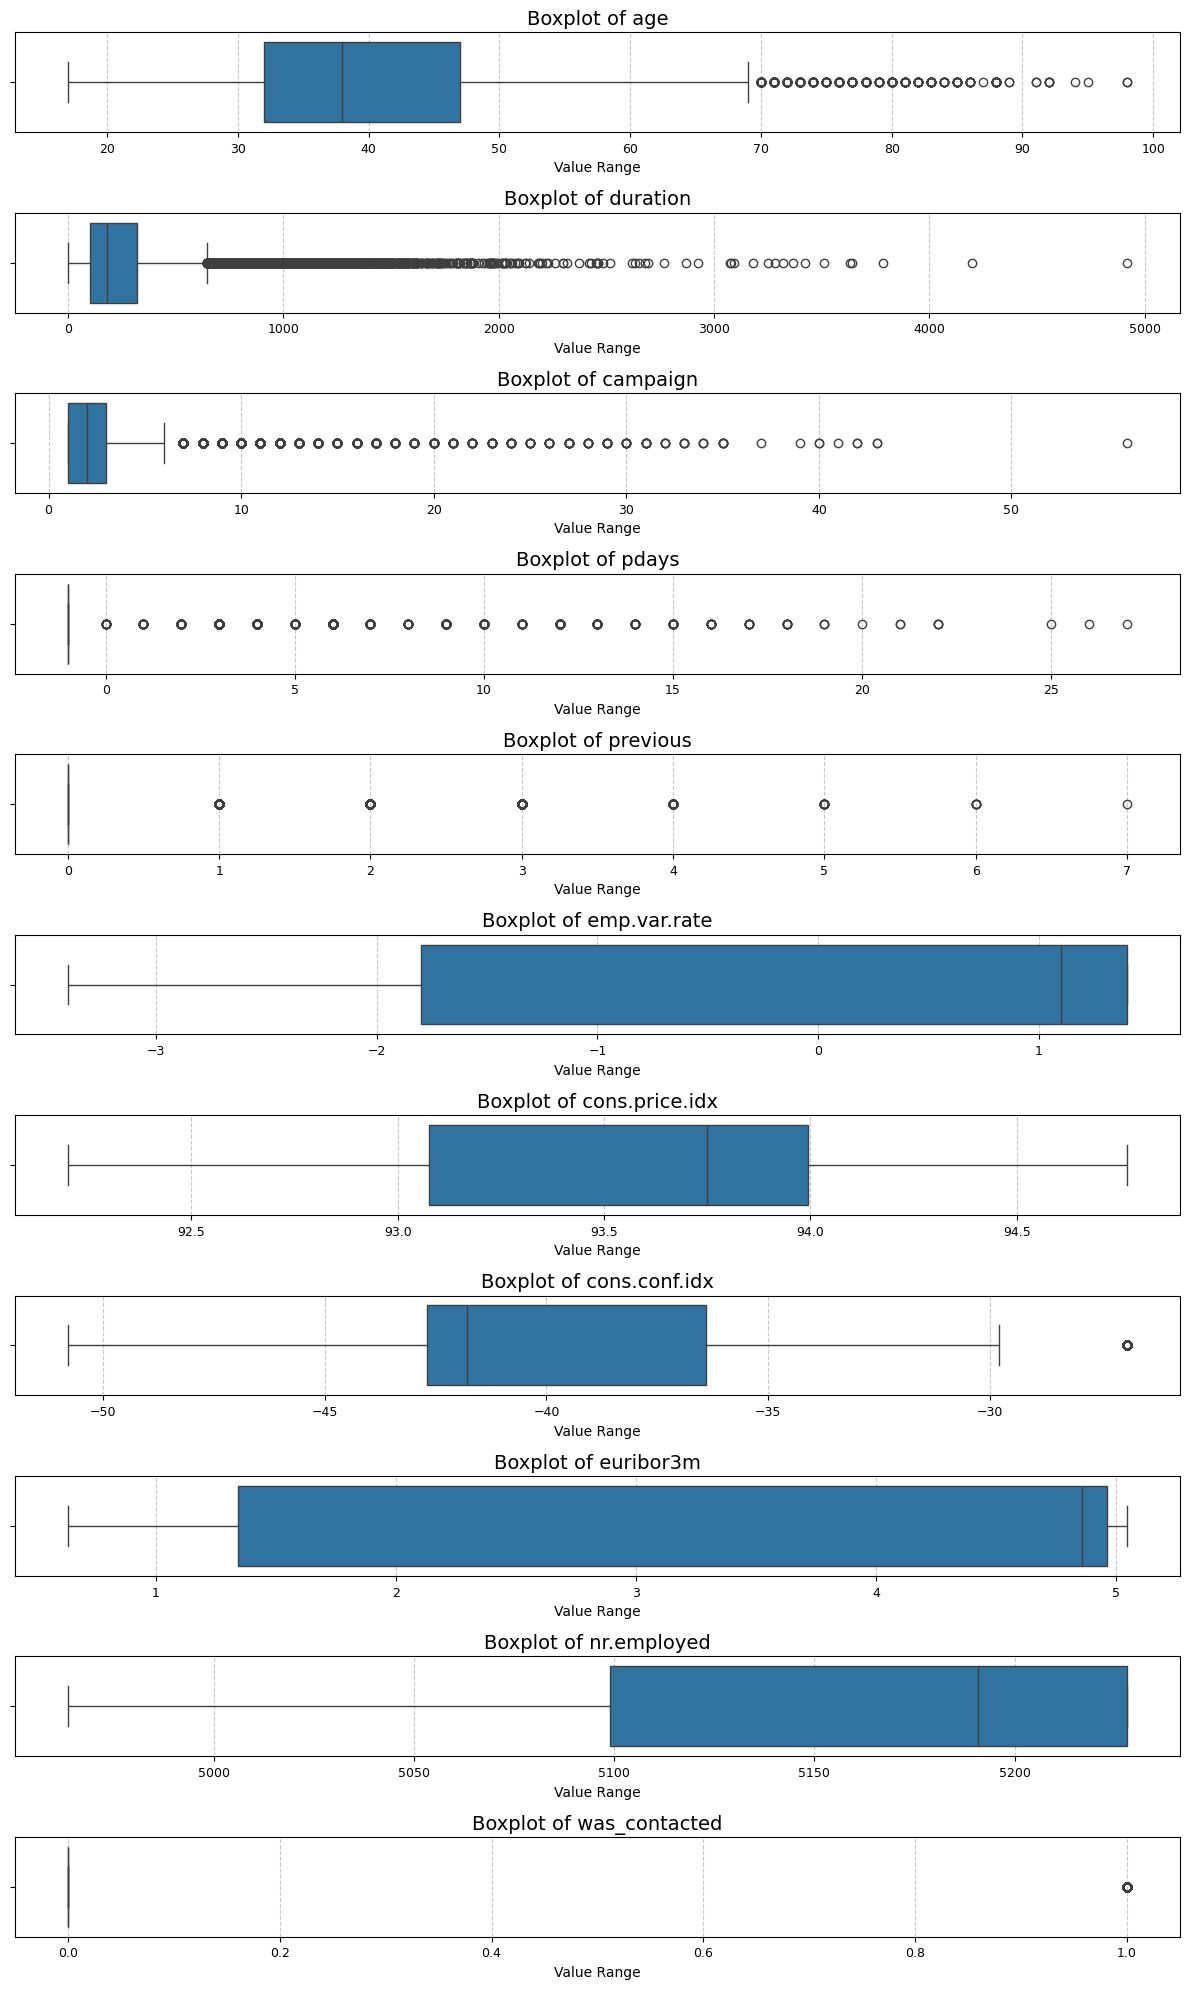


age: 469 outliers (1.14%)

duration: 2963 outliers (7.19%)

campaign: 2406 outliers (5.84%)

pdays: 1515 outliers (3.68%)

previous: 5625 outliers (13.66%)

emp.var.rate: 0 outliers (0.00%)

cons.price.idx: 0 outliers (0.00%)

cons.conf.idx: 447 outliers (1.09%)

euribor3m: 0 outliers (0.00%)

nr.employed: 0 outliers (0.00%)

was_contacted: 1515 outliers (3.68%)


In [8]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(12, 20), sharex=False)

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], orient="h")
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)
    axes[i].set_xlabel("Value Range", fontsize=10)
    axes[i].grid(axis="x", linestyle="--", alpha=0.7)
    axes[i].tick_params(axis="x", labelsize=9)
    axes[i].tick_params(axis="y", labelsize=9)

plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
def get_outliers_count(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

# Print outlier counts
for col in numerical_cols:
    outlier_count = get_outliers_count(df, col)
    outlier_percentage = (outlier_count / len(df)) * 100
    print(f"\n{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

In [9]:
# Cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply capping to numerical features
for col in numerical_cols:
    cap_outliers(df, col)


After capping the outliers



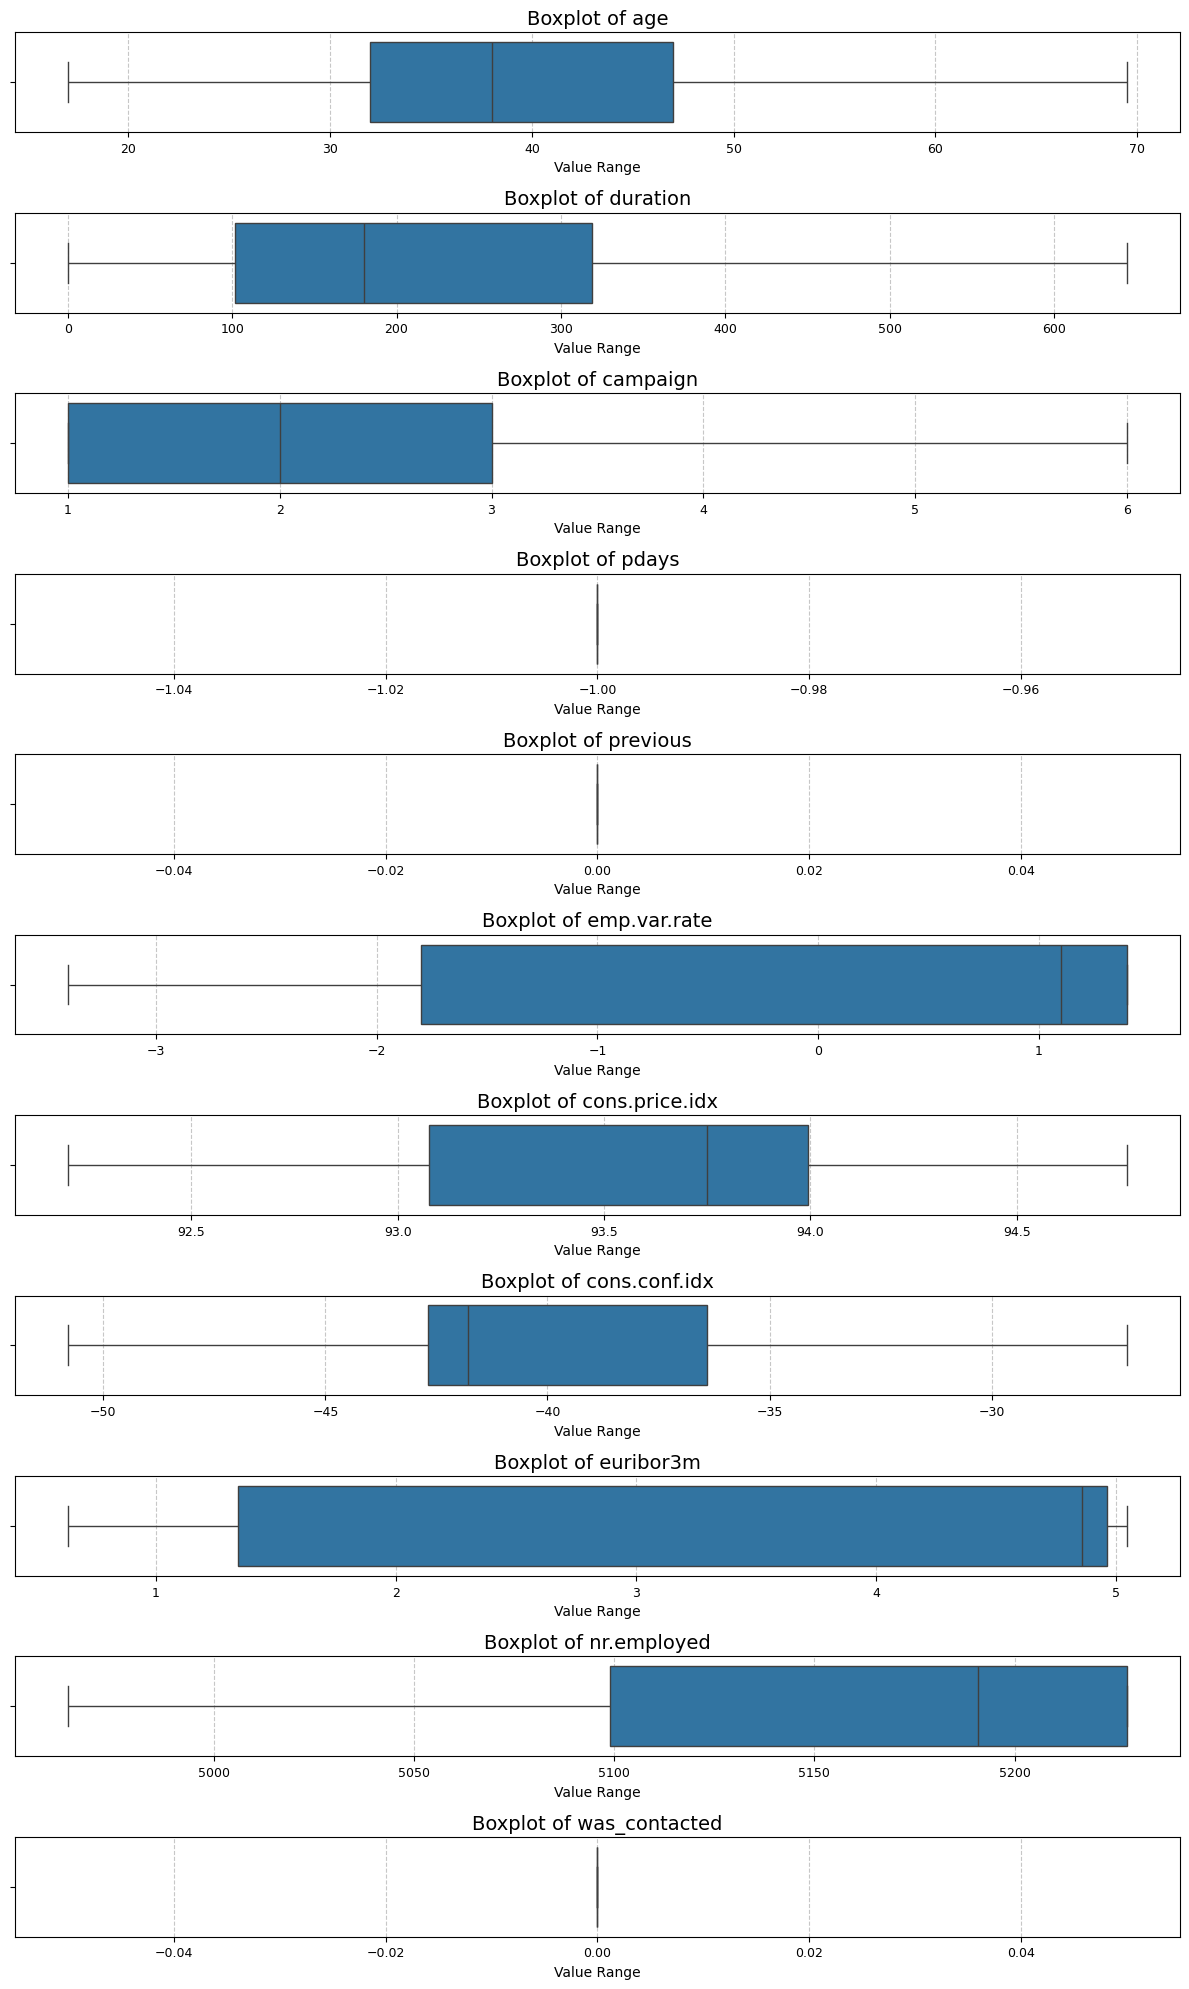


age: 0 outliers (0.00%)

duration: 0 outliers (0.00%)

campaign: 0 outliers (0.00%)

pdays: 0 outliers (0.00%)

previous: 0 outliers (0.00%)

emp.var.rate: 0 outliers (0.00%)

cons.price.idx: 0 outliers (0.00%)

cons.conf.idx: 0 outliers (0.00%)

euribor3m: 0 outliers (0.00%)

nr.employed: 0 outliers (0.00%)

was_contacted: 0 outliers (0.00%)


In [10]:
# Create subplots for each numerical feature
print("\nAfter capping the outliers\n")
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(12, 20), sharex=False)

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], orient="h")
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)
    axes[i].set_xlabel("Value Range", fontsize=10)
    axes[i].grid(axis="x", linestyle="--", alpha=0.7)
    axes[i].tick_params(axis="x", labelsize=9)
    axes[i].tick_params(axis="y", labelsize=9)

plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
def get_outliers_count(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

# Print outlier counts
for col in numerical_cols:
    outlier_count = get_outliers_count(df, col)
    outlier_percentage = (outlier_count / len(df)) * 100
    print(f"\n{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

### **1.4.2 Encoding the categorical features**

In [11]:
# Extract features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # Convert target variable to binary (1 for 'yes', 0 for 'no')

# Convert categorical columns in X to numeric using OneHotEncoder or similar
categorical_cols = X.select_dtypes(include=['object']).columns  # Identify categorical columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(X[categorical_cols])  # Encode categorical data
    X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

    # Combine encoded categorical features with numerical ones
    X = pd.concat([X.drop(columns=categorical_cols).reset_index(drop=True), X_encoded], axis=1)
else:
    X = X.reset_index(drop=True)

### **1.4.3 Handling the class imbalance**

In [12]:
# Check the distribution of the target variable
target_distribution = df['y'].value_counts()

# Display the class imbalance
print("Class Distribution in Target Variable (y):")
print(target_distribution)

print("\nThe count of 'no' as the target variable is much greater than that of 'yes', therefore, fixing this class imbalance is crucial")

Class Distribution in Target Variable (y):
y
no     36548
yes     4640
Name: count, dtype: int64

The count of 'no' as the target variable is much greater than that of 'yes', therefore, fixing this class imbalance is crucial


In [13]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the new distribution
balanced_distribution = pd.Series(y_balanced).value_counts()
print("\nClass Distribution After Applying SMOTE:")
print(balanced_distribution)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class Distribution After Applying SMOTE:
y
0    36548
1    36548
Name: count, dtype: int64


### **1.4.4 Normalizing the numerical features**

In [14]:
# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### **1.4.5 Splitting the preprocessed dataset**

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# **2. Implmentation**

## **2.1 Nueral Network**

### **2.1.1 Building the nueral network architecture**

In [22]:
# Build the Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(32, activation='relu'),                              # Hidden layer
    Dense(1, activation='sigmoid')                             # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **2.1.2 Compiling the model**

In [23]:
# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

### **2.1.3 Training the nueral network**

In [24]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=16, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/16
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6686 - loss: 9.6023 - val_accuracy: 0.7176 - val_loss: 1.8276
Epoch 2/16
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7900 - loss: 0.8746 - val_accuracy: 0.7215 - val_loss: 2.0352
Epoch 3/16
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8047 - loss: 0.7997 - val_accuracy: 0.8738 - val_loss: 0.5568
Epoch 4/16
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8067 - loss: 0.7644 - val_accuracy: 0.8718 - val_loss: 0.3715
Epoch 5/16
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8165 - loss: 0.6006 - val_accuracy: 0.8347 - val_loss: 0.5973
Epoch 6/16
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8192 - loss: 0.5683 - val_accuracy: 0.8793 - val_loss: 0.3567
Epoch 7/16
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8337 - loss: 0.4833 - val_accuracy: 0.8752 - val_loss: 0.3288
Epoch 8/16
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8341 - loss: 0.4690 - 

## **2.2 Random Forest Algorithm**

### **2.2.1 Random forest intializing and training**

In [25]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **3. Model Evaluation**

## **3.1 Neural Network Evaluation**

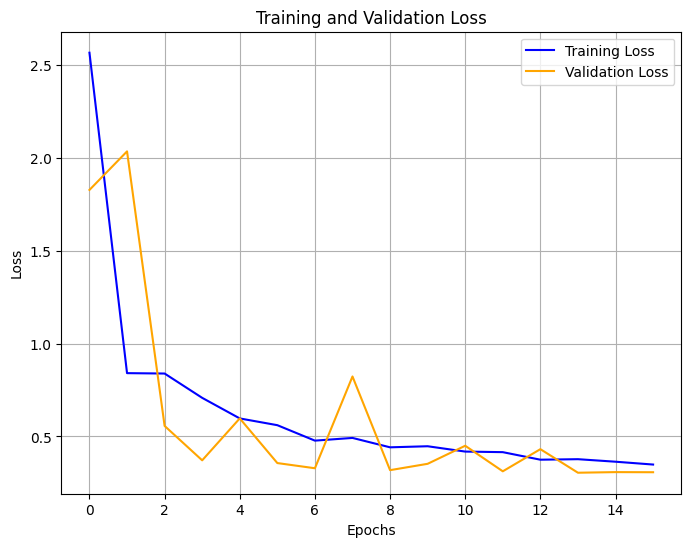

In [26]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Make predictions
nn_predictions = nn_model.predict(X_test)
nn_predictions = (nn_predictions > 0.5).astype(int)  # Convert probabilities to binary


# Evaluate the model
print("\nNeural Network Performance:")
print(f"Accuracy: {accuracy_score(y_test, nn_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, nn_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nn_predictions))

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Neural Network Performance:
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7332
           1       0.88      0.88      0.88      7288

    accuracy                           0.88     14620
   macro avg       0.88      0.88      0.88     14620
weighted avg       0.88      0.88      0.88     14620

Confusion Matrix:
[[6424  908]
 [ 866 6422]]


## **3.2 Random Forest Evaluation**

In [29]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Classifier Performance:
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7332
           1       0.96      0.94      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620

Confusion Matrix:
[[7071  261]
 [ 438 6850]]
